In [4]:
%load_ext sql

In [12]:
%env DATABASE_URL=mysql+mysqlconnector://root@localhost/ucursos

env: DATABASE_URL=mysql+mysqlconnector://root@localhost/ucursos


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [15, 5]

# Exploración básica

## Total mensajes

In [18]:
%sql SELECT COUNT(*) AS "Total Mensajes" FROM MENSAJES_INGENIERIA

 * mysql+mysqlconnector://root@localhost/ucursos
1 rows affected.


Total Mensajes
1376786


## Total threads (discusiones)

In [20]:
%%sql 
SELECT COUNT(*) AS "Total threads" 
FROM MENSAJES_INGENIERIA
WHERE MEN_MEN_ID = 0;

 * mysql+mysqlconnector://root@localhost/ucursos
1 rows affected.


Total threads
96657


## Total usuarios

In [21]:
%%sql
SELECT COUNT(DISTINCT MEN_RUT) AS "Total Usuarios"
FROM MENSAJES_INGENIERIA

 * mysql+mysqlconnector://root@localhost/ucursos
1 rows affected.


Total Usuarios
11341


## Rango de fechas

In [56]:
%%sql
SELECT MIN(MEN_FECHA_CREACION), MAX(MEN_FECHA_CREACION)
FROM MENSAJES_INGENIERIA

 * mysql+mysqlconnector://root@localhost/ucursos
1 rows affected.


MIN(MEN_FECHA_CREACION),MAX(MEN_FECHA_CREACION)
2002-03-11 12:16:44,2019-08-01 12:44:51


## Categorías del foro

In [59]:
%%sql
SELECT MEN_TEM_NOMBRE AS "CATEGORIA", COUNT(*) AS "MENSAJES"
FROM MENSAJES_INGENIERIA
GROUP BY MEN_TEM_NOMBRE
ORDER BY MENSAJES DESC

 * mysql+mysqlconnector://root@localhost/ucursos
9 rows affected.


CATEGORIA,MENSAJES
Temas Generales,857673
Actividades Extraprogramáticas,149553
Asuntos Docentes,139741
Asuntos Domésticos,98688
CEI,50862
Cosas Perdidas / Encontradas,45404
FECH,22009
CEPC,8762
Encuestas Docentes,4094


# Volúmenes, distribuciones

## Volumen de mensajes en el tiempo

In [31]:
%%sql mensajes_dia <<
SELECT COUNT(*) AS "CANTIDAD", DATE(MEN_FECHA_CREACION) AS "FECHA"
FROM MENSAJES_INGENIERIA
WHERE MEN_CENSURADO = 0
GROUP BY DATE(MEN_FECHA_CREACION)

 * mysql+mysqlconnector://root@localhost/ucursos
5509 rows affected.
Returning data to local variable mensajes_dia


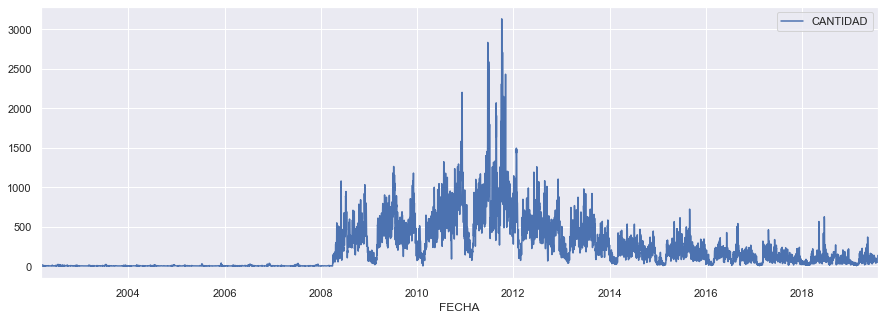

In [52]:
df = mensajes_dia.DataFrame()
df.set_index('FECHA').plot()

## Volumen de threads en el tiempo

In [54]:
%%sql threads_dia <<
SELECT COUNT(*) AS "CANTIDAD", DATE(MEN_FECHA_CREACION) AS "FECHA"
FROM MENSAJES_INGENIERIA
WHERE MEN_CENSURADO = 0 AND MEN_MEN_ID = 0
GROUP BY DATE(MEN_FECHA_CREACION)

 * mysql+mysqlconnector://root@localhost/ucursos
5069 rows affected.
Returning data to local variable threads_dia


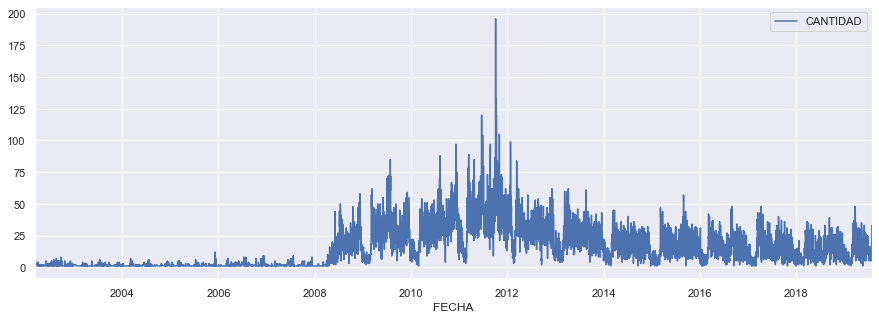

In [55]:
df = threads_dia.DataFrame()
df.set_index('FECHA').plot()

## Distribución de usuarios que escriben mensajes

In [132]:
%%sql mensajes_usuarios <<
SELECT MEN_RUT AS "USER", COUNT(*) AS "MENSAJES"
FROM MENSAJES_INGENIERIA
GROUP BY USER
ORDER BY MENSAJES DESC

 * mysql+mysqlconnector://root@localhost/ucursos
11341 rows affected.
Returning data to local variable mensajes_usuarios


In [133]:
df = mensajes_usuarios.DataFrame()

La fracción $y$ de usuarios que ha publicado $x$ mensajes


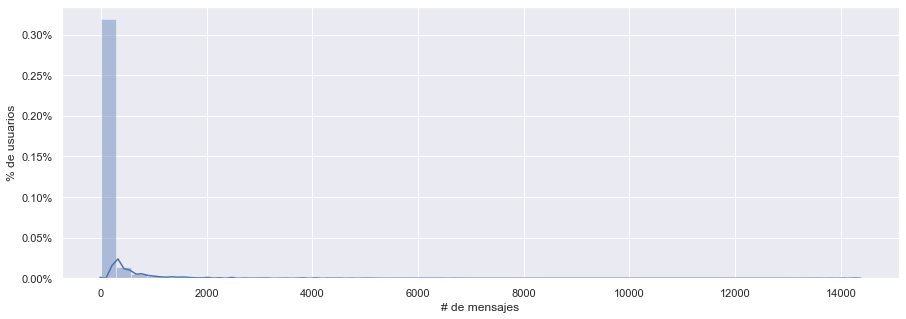

In [134]:
ax = sns.distplot(df['MENSAJES'])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set(xlabel="# de mensajes", ylabel="% de usuarios")

print("La fracción $y$ de usuarios que ha publicado $x$ mensajes")

In [135]:
%%sql threads_usuarios <<
SELECT MEN_RUT AS "USER", COUNT(*) AS "MENSAJES"
FROM MENSAJES_INGENIERIA
WHERE MEN_MEN_ID = 0
GROUP BY USER
ORDER BY MENSAJES DESC

 * mysql+mysqlconnector://root@localhost/ucursos
9309 rows affected.
Returning data to local variable threads_usuarios


El % de usuarios que ha publicado Y threads


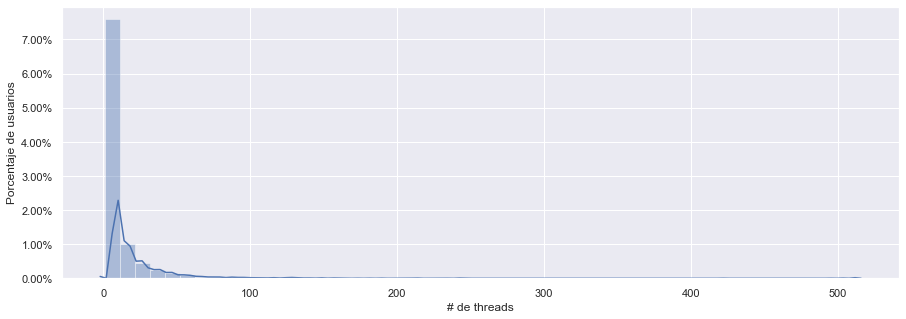

In [136]:
df = threads_usuarios.DataFrame()
ax = sns.distplot(df['MENSAJES'])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set(xlabel="# de threads", ylabel="Porcentaje de usuarios")
print("El % de usuarios que ha publicado Y threads")